# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [4]:

rent_avg_month = df['count'].resample('ME').mean()
rent_avg_month

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
2011-06-30    196.877193
2011-07-31    203.614035
2011-08-31    182.666667
2011-09-30    174.622517
2011-10-31    174.773626
2011-11-30    155.458333
2011-12-31    134.173246
2012-01-31    124.353201
2012-02-29    145.646154
2012-03-31    208.276923
2012-04-30    257.455947
2012-05-31    264.109649
2012-06-30    287.186404
2012-07-31    267.037281
2012-08-31    285.570175
2012-09-30    292.598684
2012-10-31    280.508772
2012-11-30    231.980220
2012-12-31    217.054825
Freq: ME, Name: count, dtype: float64

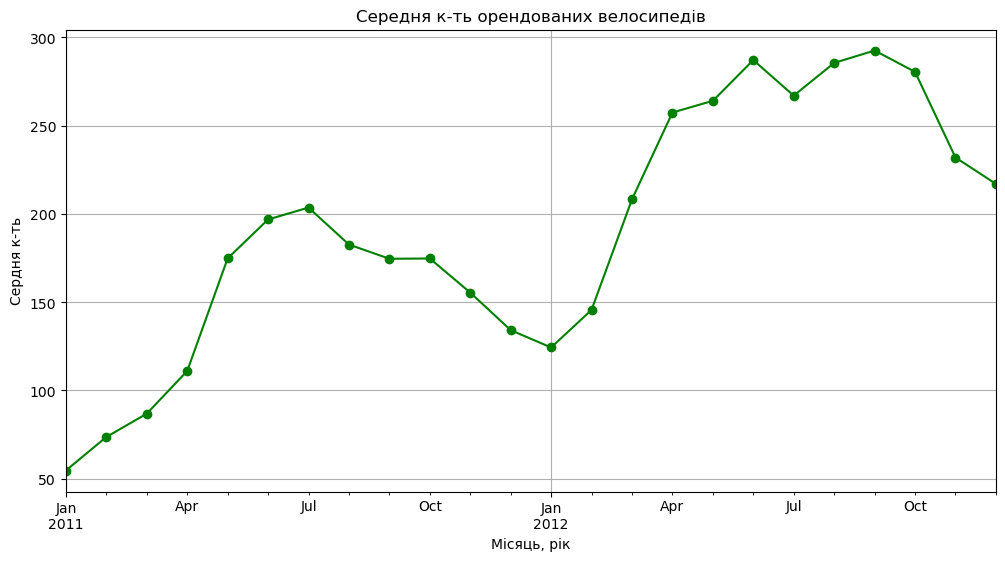

In [5]:
rent_avg_month.plot(
    figsize=(12, 6),
    marker='o',
    title='Середня к-ть орендованих велосипедів',
    ylabel='Сердня к-ть',
    xlabel='Місяць, рік',
    grid=True,
    color= 'green' 
    );
plt.show()

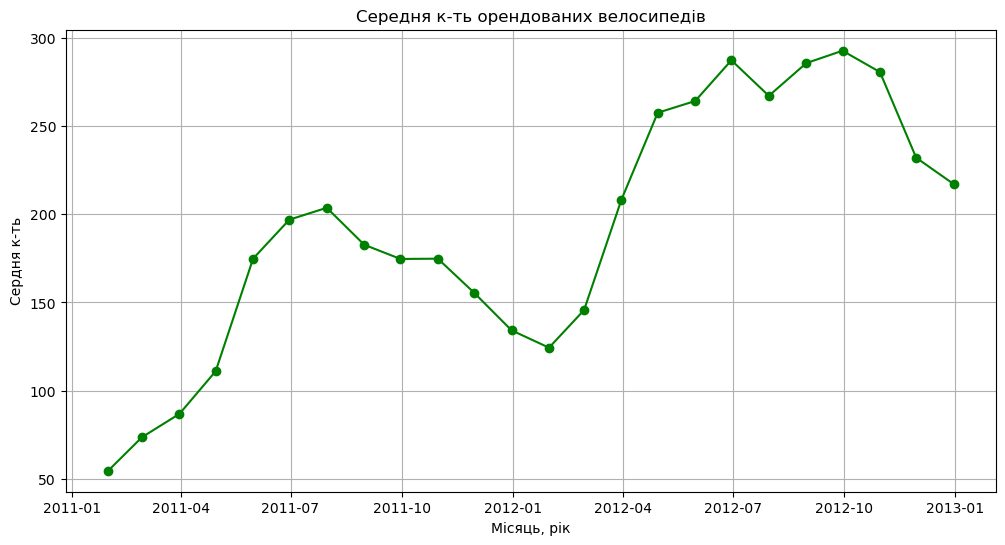

In [6]:
# Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(rent_avg_month, 'o-g')
plt.title('Середня к-ть орендованих велосипедів')
plt.xlabel('Місяць, рік')
plt.ylabel('Cердня к-ть')
plt.grid(True)
plt.show()

Ми бачимо різницю відображення дат по осі х. Також на першому графіку відображаються дані на початок місяця на другому на кінець місяця. Також ми бачимо різницю в допоміжних лініях.
Мені подобаєтьсся графік побудований за допомогою  Matplotlib, він виглядає більш чіткіше, також домоміжні лінії зручніші.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [7]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1
labels = ['Понеділок', 'Вівторок', 'Середа', 'Четвер', "П'ятниця", 'Субота', 'Неділя']

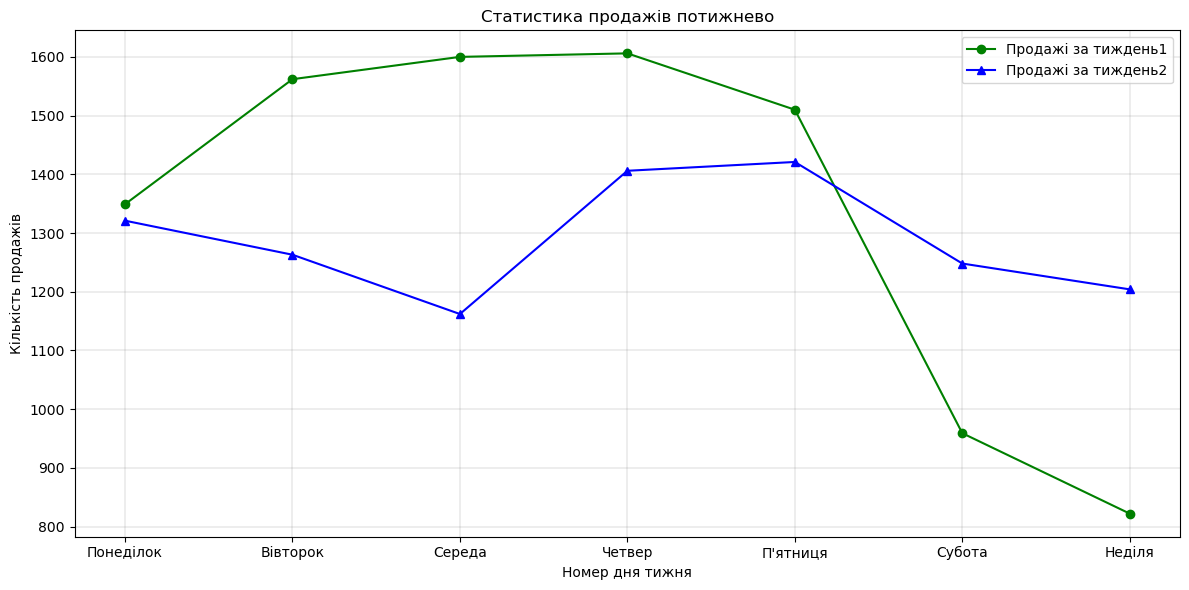

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(days, sales_week1, 'o-g', label='Продажі за тиждень1')
plt.plot(days, sales_week2, '^-b', label='Продажі за тиждень2')

plt.xticks(days, labels)
plt.title('Статистика продажів потижнево')
plt.ylabel('Кількість продажів')
plt.xlabel('Номер дня тижня')
plt.grid(color='gray', linewidth=0.2)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
sales_week1_series = pd.Series(sales_week1)
print(sales_week1_series.describe())

count       7.000000
mean     1344.000000
std       324.035492
min       822.000000
25%      1154.000000
50%      1510.000000
75%      1581.000000
max      1606.000000
dtype: float64


In [11]:
sales_week1_series = pd.Series(sales_week2)
print(sales_week1_series.describe())

count       7.000000
mean     1289.285714
std        98.189806
min      1162.000000
25%      1226.000000
50%      1263.000000
75%      1363.500000
max      1421.000000
dtype: float64


1. Більш стабільні продажі були у 2 тиждень, оскільки у перший тиждень спостерігаємо високі продажі на початку, але різке падіння на вихідних. У другому тижні продажі більш рівномірні протягом усього тижня.

2. Це підтверджують попередні розрахунки. Зокрема:
- стандартне відхилення у 1 тижні становить 324, а у 2 — 98, що свідчить про більшу варіативність у першому випадку;
- різниця між мінімальним і максимальним значенням у 1 тижні також значно більша (784 проти 259).

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [17]:
avg_temp_month = df.groupby ('month')['temp'].mean()
                             
avg_rent_season = df.groupby('season')['count'].mean()



Text(0, 0.5, 'Кількість оренд')

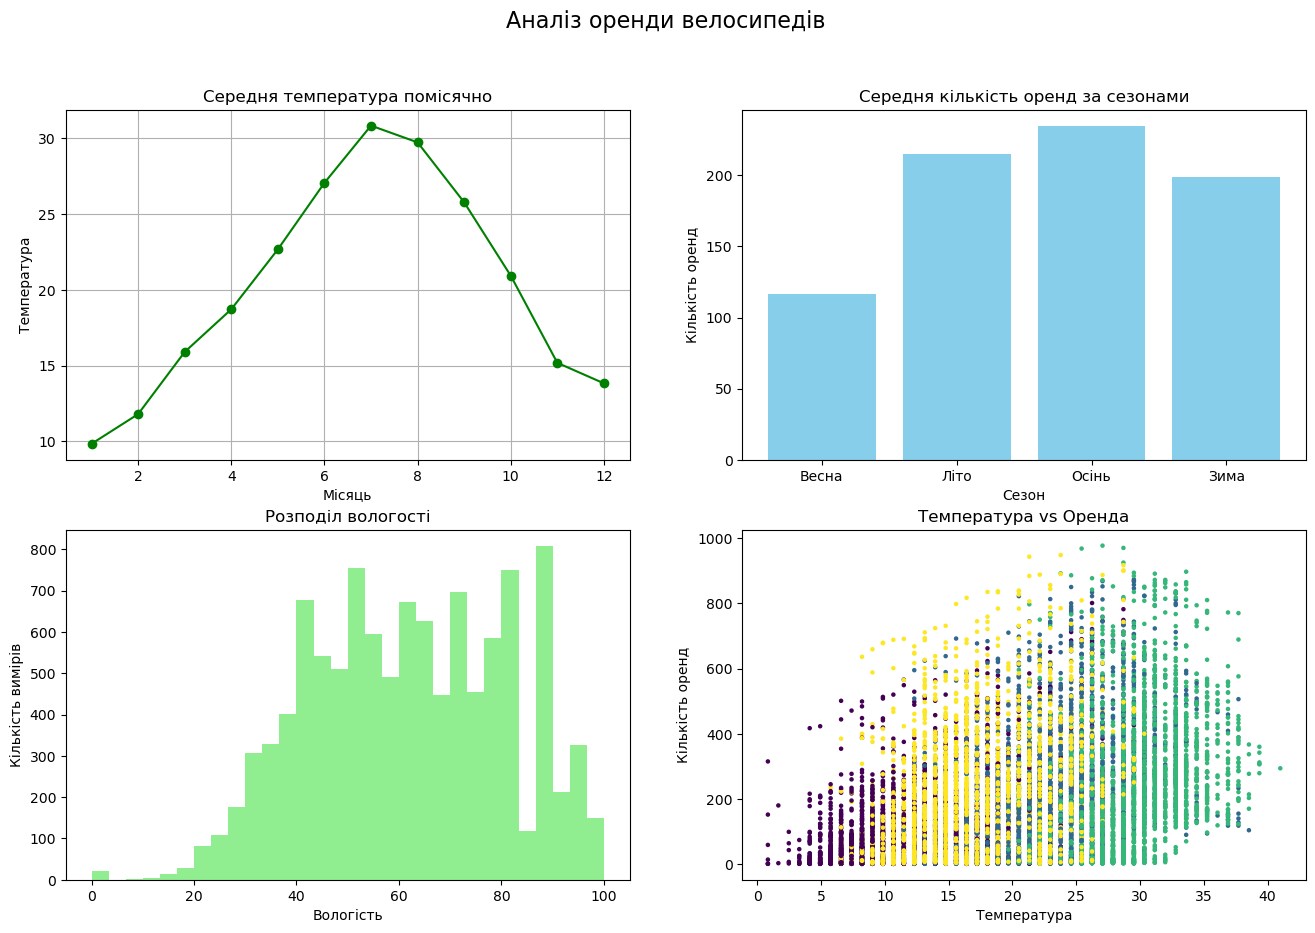

In [18]:
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Аналіз оренди велосипедів', fontsize=16) 


plt.subplot(2, 2, 1)
plt.plot(avg_temp_month, marker='o', color='green')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць', fontsize=10)
plt.ylabel('Температура')
plt.grid(True)

positions = [1, 2, 3, 4]
labels = ['Весна', 'Літо', 'Осінь', 'Зима']
plt.subplot(2, 2, 2)
plt.bar(avg_rent_season.index, avg_rent_season.values, color='skyblue')
plt.title('Середня кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.xticks(positions, labels) 


plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=30, color='lightgreen')
plt.title('Розподіл вологості')
plt.xlabel('Вологість')
plt.ylabel('Кількість вимірів')


plt.subplot(2, 2, 4)
plt.scatter(x = df['temp'],  y= df['count'], c = df['season'], cmap='viridis', s=5)
plt.title('Температура vs Оренда')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')


## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

Text(0, 0.5, 'Кількість оренд')

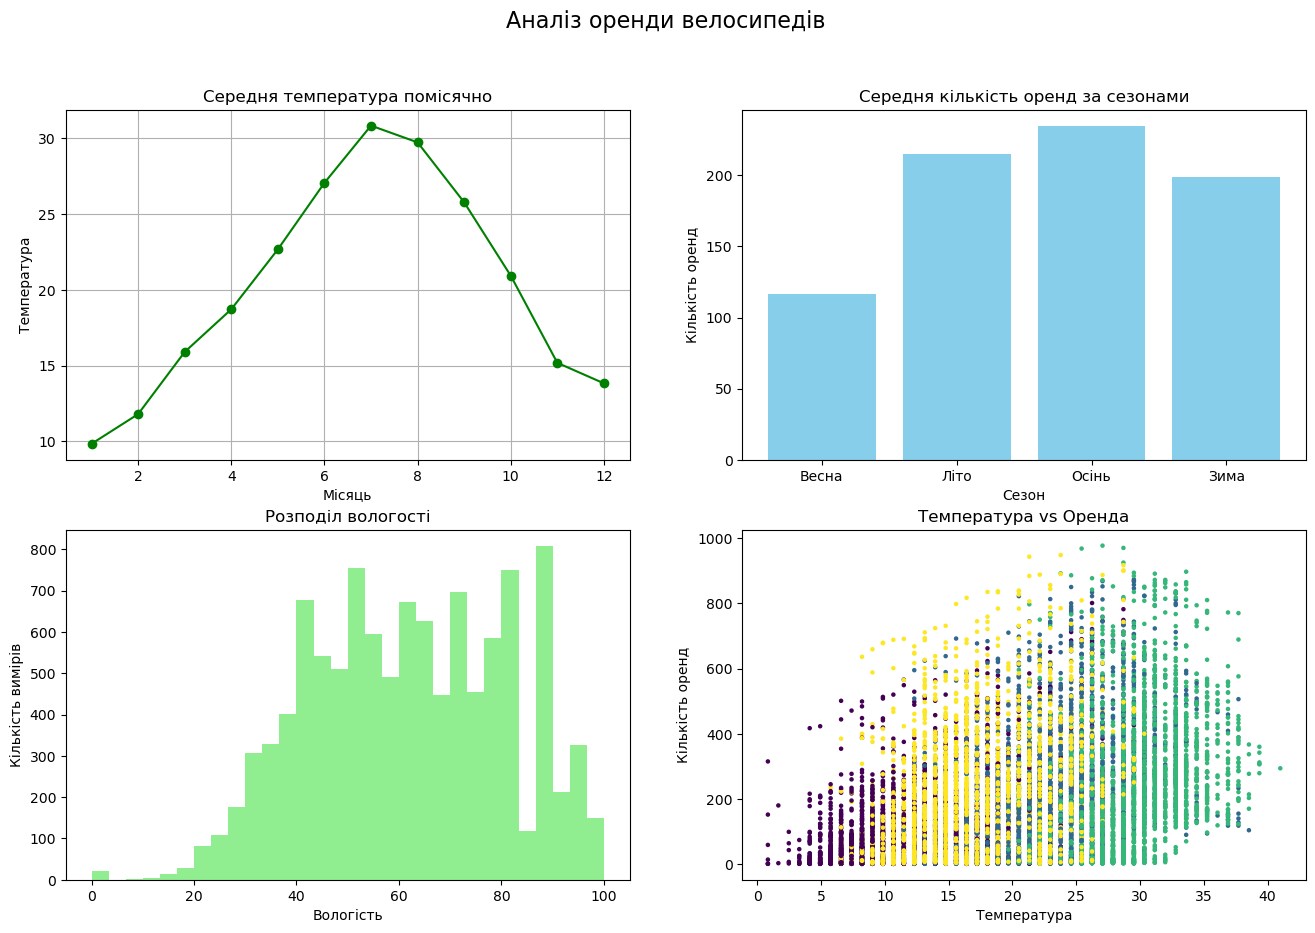

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Аналіз оренди велосипедів', fontsize=16) 



ax[0,0].plot(avg_temp_month, marker='o', color='green')
ax[0,0].set_title('Середня температура помісячно')
ax[0,0].set_xlabel('Місяць', fontsize=10)
ax[0,0].set_ylabel('Температура')
ax[0,0].grid(True)


ax[0,1].bar(avg_rent_season.index, avg_rent_season.values, color='skyblue')
ax[0,1].set_title('Середня кількість оренд за сезонами')
ax[0,1].set_xlabel('Сезон')
ax[0,1].set_ylabel('Кількість оренд')
ax[0,1].set_xticks(positions, labels) 



ax[1,0].hist(df['humidity'], bins=30, color='lightgreen')
ax[1,0].set_title('Розподіл вологості')
ax[1,0].set_xlabel('Вологість')
ax[1,0].set_ylabel('Кількість вимірів')

ax[1,1].scatter(x = df['temp'],  y= df['count'], c = df['season'], cmap='viridis', s=5)
ax[1,1].set_title('Температура vs Оренда')
ax[1,1].set_xlabel('Температура')
ax[1,1].set_ylabel('Кількість оренд')





In [ ]:
Побудова через plt.subplot() — це швидкий спосіб створення кількох графіків, проте він менш зручний для подальших налаштувань.
plt.subplots() — більш гнучкий і професійний підхід, який дає змогу легко керувати кожним графіком окремо.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [12]:
monthly_stats = df.resample('ME')['count'].agg(['mean', 'min', 'max'])


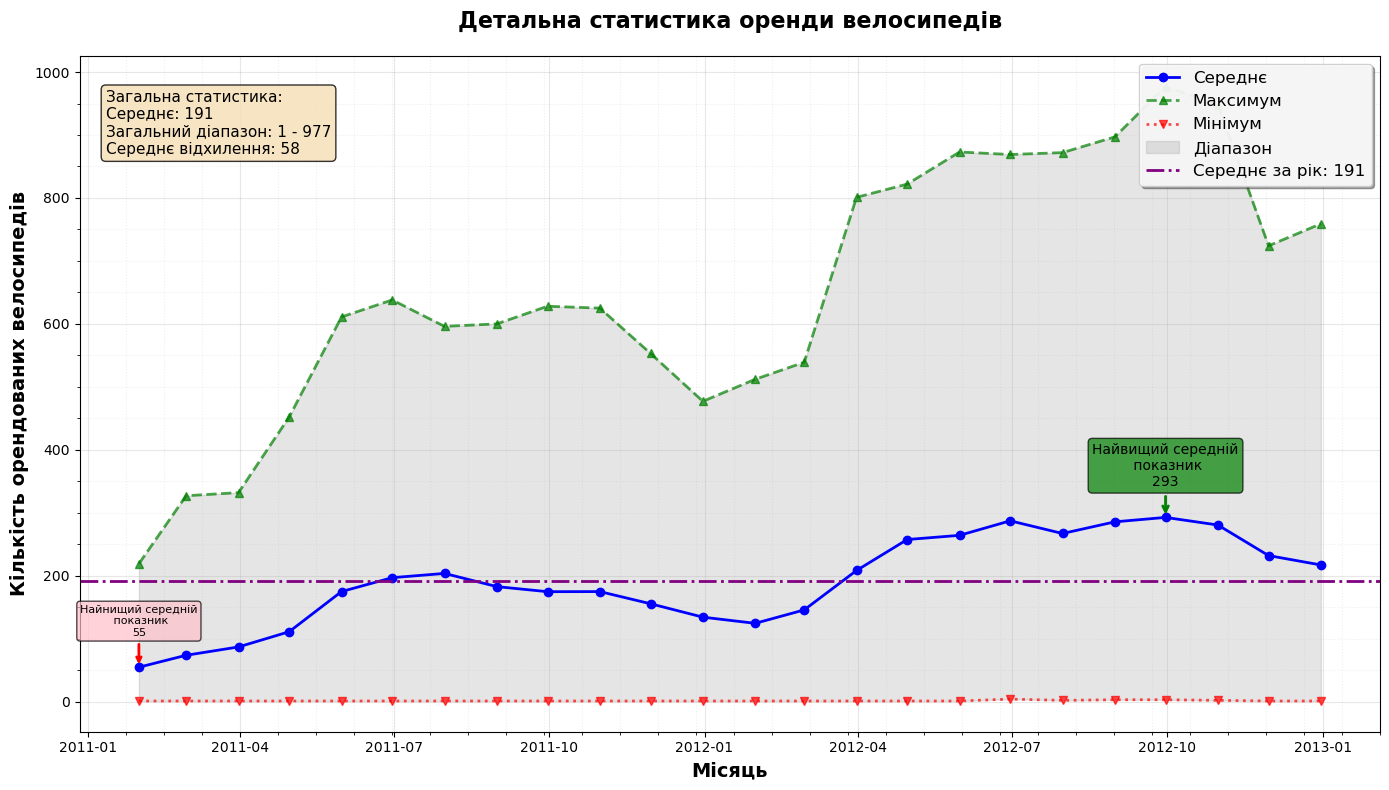

In [14]:

fig, ax = plt.subplots(figsize=(14, 8))


ax.plot(monthly_stats.index, monthly_stats['mean'], 'b-o', linewidth=2,
        label='Середнє', markersize=6)
ax.plot(monthly_stats.index, monthly_stats['max'], 'g--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(monthly_stats.index, monthly_stats['min'], 'r:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)

ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'],
                alpha=0.2, color='gray', label='Діапазон')

max_idx = monthly_stats['mean'].idxmax()
max_val = monthly_stats['mean'].max()
ax.annotate(f'Найвищий середній\n показник\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 50),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=10, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='green', alpha=0.7))

min_idx = monthly_stats['mean'].idxmin()
min_val = monthly_stats['mean'].min()
ax.annotate(f'Найнищий середній\n показник\n{min_val:.0f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val +50),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=8, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='pink', alpha=0.7))

overall_mean = monthly_stats['mean'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {overall_mean:.0f}')

ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)

textstr = (f'Загальна статистика:\n')
textstr += f'Середнє: {monthly_stats["mean"].mean():.0f}\n'
textstr += f'Загальний діапазон: {monthly_stats["min"].min():.0f} - {monthly_stats["max"].max():.0f}\n'
textstr += f'Середнє відхилення: {(monthly_stats['mean'] - monthly_stats['mean'].mean()).abs().mean():.0f}'
#textstr += f'Середнє відхилення: {mad_monthly:.0f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість орендованих велосипедів', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика оренди велосипедів', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

1.Анотації допомагають звернути увагу на важливу інформацію, покращує сприйняття графіка та надає контекст.
2. fill_between() використовуюит для затіненню між двома лініями(може бути між лініями які відображають різні показники, або між осю і побудованою лінією). Це допомагає підкреслити діапазон між значеннями або акцент на область понад/менш певного рівня.
3.Текстовий блок дозволяє додати пояснення до графіка, важливих подій та допомагає підвищити більш краще сприйняття графіка